In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min


#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel('infoclientebanca.xlsx')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47871 entries, 0 to 47870
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   CLIENTE                                  47871 non-null  int64  
 1   grupo_de_cliente                         47871 non-null  object 
 2   Numero_de_transacciones                  47871 non-null  int64  
 3   promedio_por_transaccion                 47871 non-null  float64
 4   transaccion_minima                       47871 non-null  float64
 5   transaccion_maxima                       47871 non-null  float64
 6   desviacion_estandar_por_transaccion      47871 non-null  float64
 7   porcentaje_visa_nacional                 47871 non-null  float64
 8   porcentaje_visa_internacional            47871 non-null  float64
 9   porcentaje_mastercard_nacional           47871 non-null  float64
 10  porcentaje_mastercard_internacional      47871

array([[<AxesSubplot:title={'center':'CLIENTE'}>,
        <AxesSubplot:title={'center':'Numero_de_transacciones'}>,
        <AxesSubplot:title={'center':'promedio_por_transaccion'}>,
        <AxesSubplot:title={'center':'transaccion_minima'}>,
        <AxesSubplot:title={'center':'transaccion_maxima'}>],
       [<AxesSubplot:title={'center':'desviacion_estandar_por_transaccion'}>,
        <AxesSubplot:title={'center':'porcentaje_visa_nacional'}>,
        <AxesSubplot:title={'center':'porcentaje_visa_internacional'}>,
        <AxesSubplot:title={'center':'porcentaje_mastercard_nacional'}>,
        <AxesSubplot:title={'center':'porcentaje_mastercard_internacional'}>],
       [<AxesSubplot:title={'center':'Porcentaje_otrafranquicia_nacional'}>,
        <AxesSubplot:title={'center':'porcentaje_otrafranquicia_internacional'}>,
        <AxesSubplot:title={'center':'porcentaje_nacional_total'}>,
        <AxesSubplot:title={'center':'porcentaje_internacional_total'}>,
        <AxesSubplot:titl

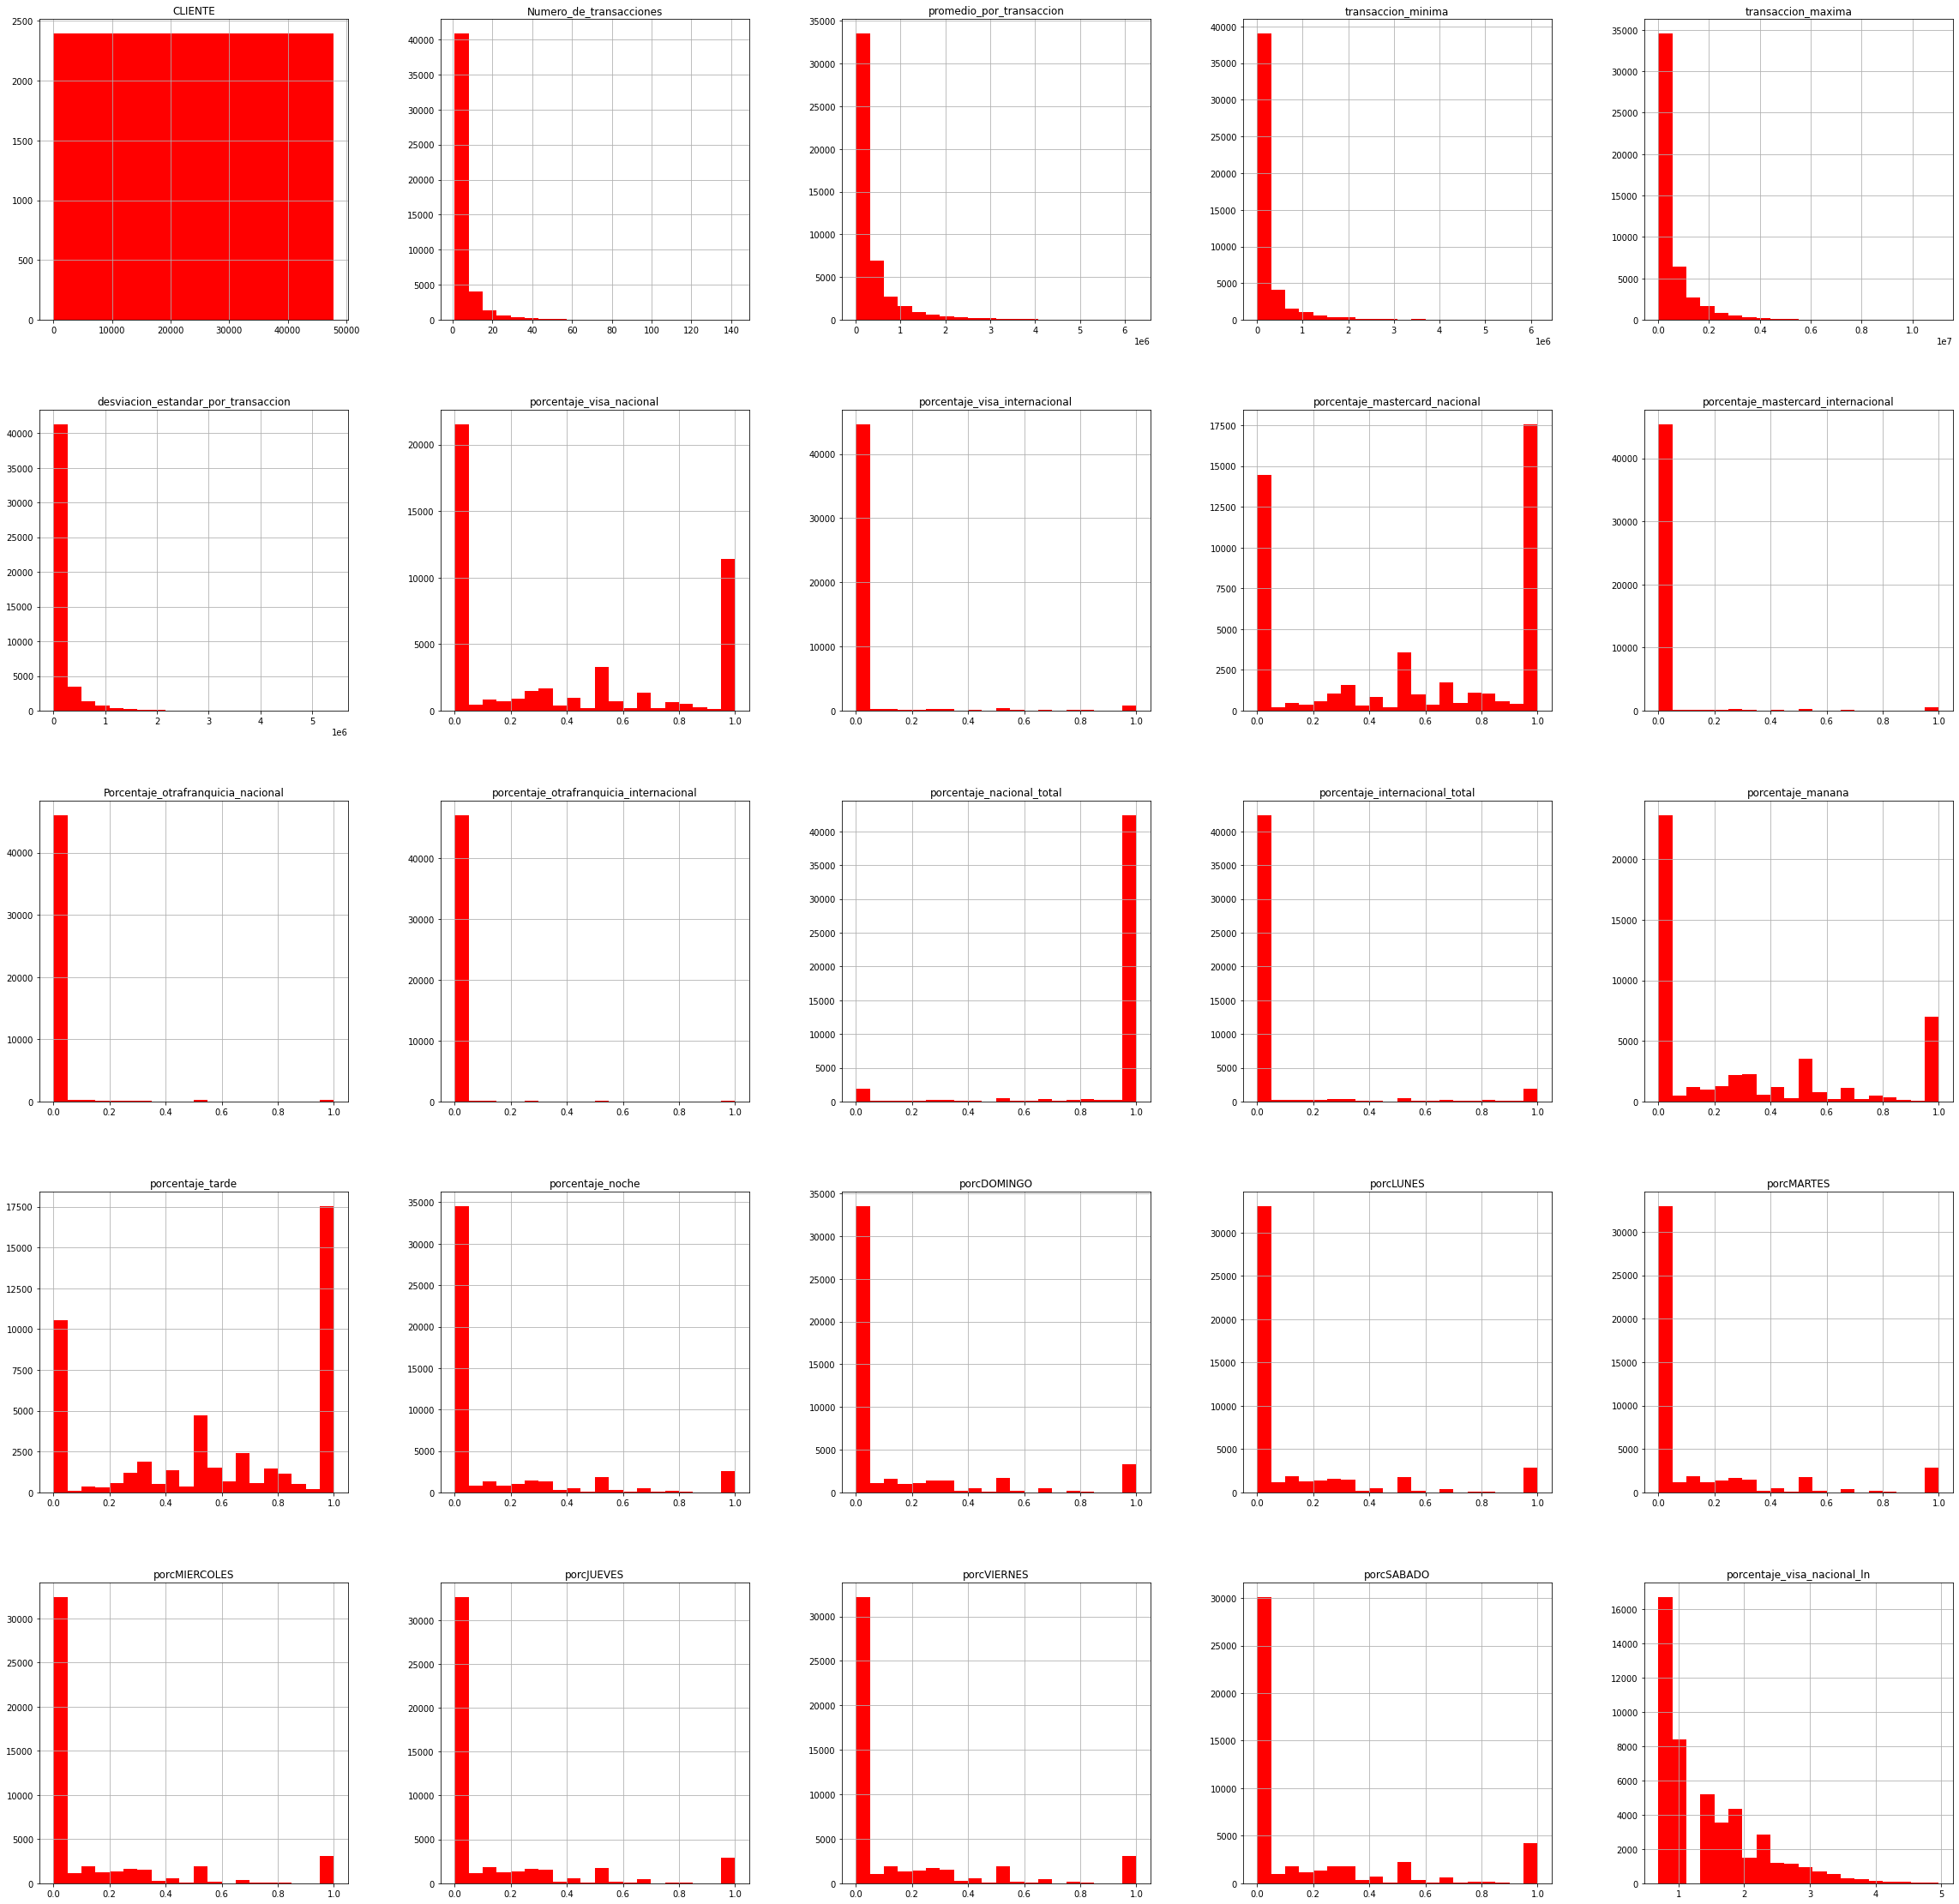

In [16]:
df.hist(bins = 20, figsize=(40,40), color = 'r')

In [18]:
df['Numero_de_transacciones_ln'] = np.log1p(df['Numero_de_transacciones'])
df['promedio_por_transaccion_ln'] = np.log1p(df['promedio_por_transaccion'])
df['transaccion_minima_ln'] = np.log1p(df['transaccion_minima'])
df['transaccion_maxima_ln'] = np.log1p(df['transaccion_maxima'])
df['desviacion_estandar_por_transaccion_ln'] = np.log1p(df['desviacion_estandar_por_transaccion'])

array([[<AxesSubplot:title={'center':'CLIENTE'}>,
        <AxesSubplot:title={'center':'Numero_de_transacciones'}>,
        <AxesSubplot:title={'center':'promedio_por_transaccion'}>,
        <AxesSubplot:title={'center':'transaccion_minima'}>,
        <AxesSubplot:title={'center':'transaccion_maxima'}>],
       [<AxesSubplot:title={'center':'desviacion_estandar_por_transaccion'}>,
        <AxesSubplot:title={'center':'porcentaje_visa_nacional'}>,
        <AxesSubplot:title={'center':'porcentaje_visa_internacional'}>,
        <AxesSubplot:title={'center':'porcentaje_mastercard_nacional'}>,
        <AxesSubplot:title={'center':'porcentaje_mastercard_internacional'}>],
       [<AxesSubplot:title={'center':'Porcentaje_otrafranquicia_nacional'}>,
        <AxesSubplot:title={'center':'porcentaje_otrafranquicia_internacional'}>,
        <AxesSubplot:title={'center':'porcentaje_nacional_total'}>,
        <AxesSubplot:title={'center':'porcentaje_internacional_total'}>,
        <AxesSubplot:titl

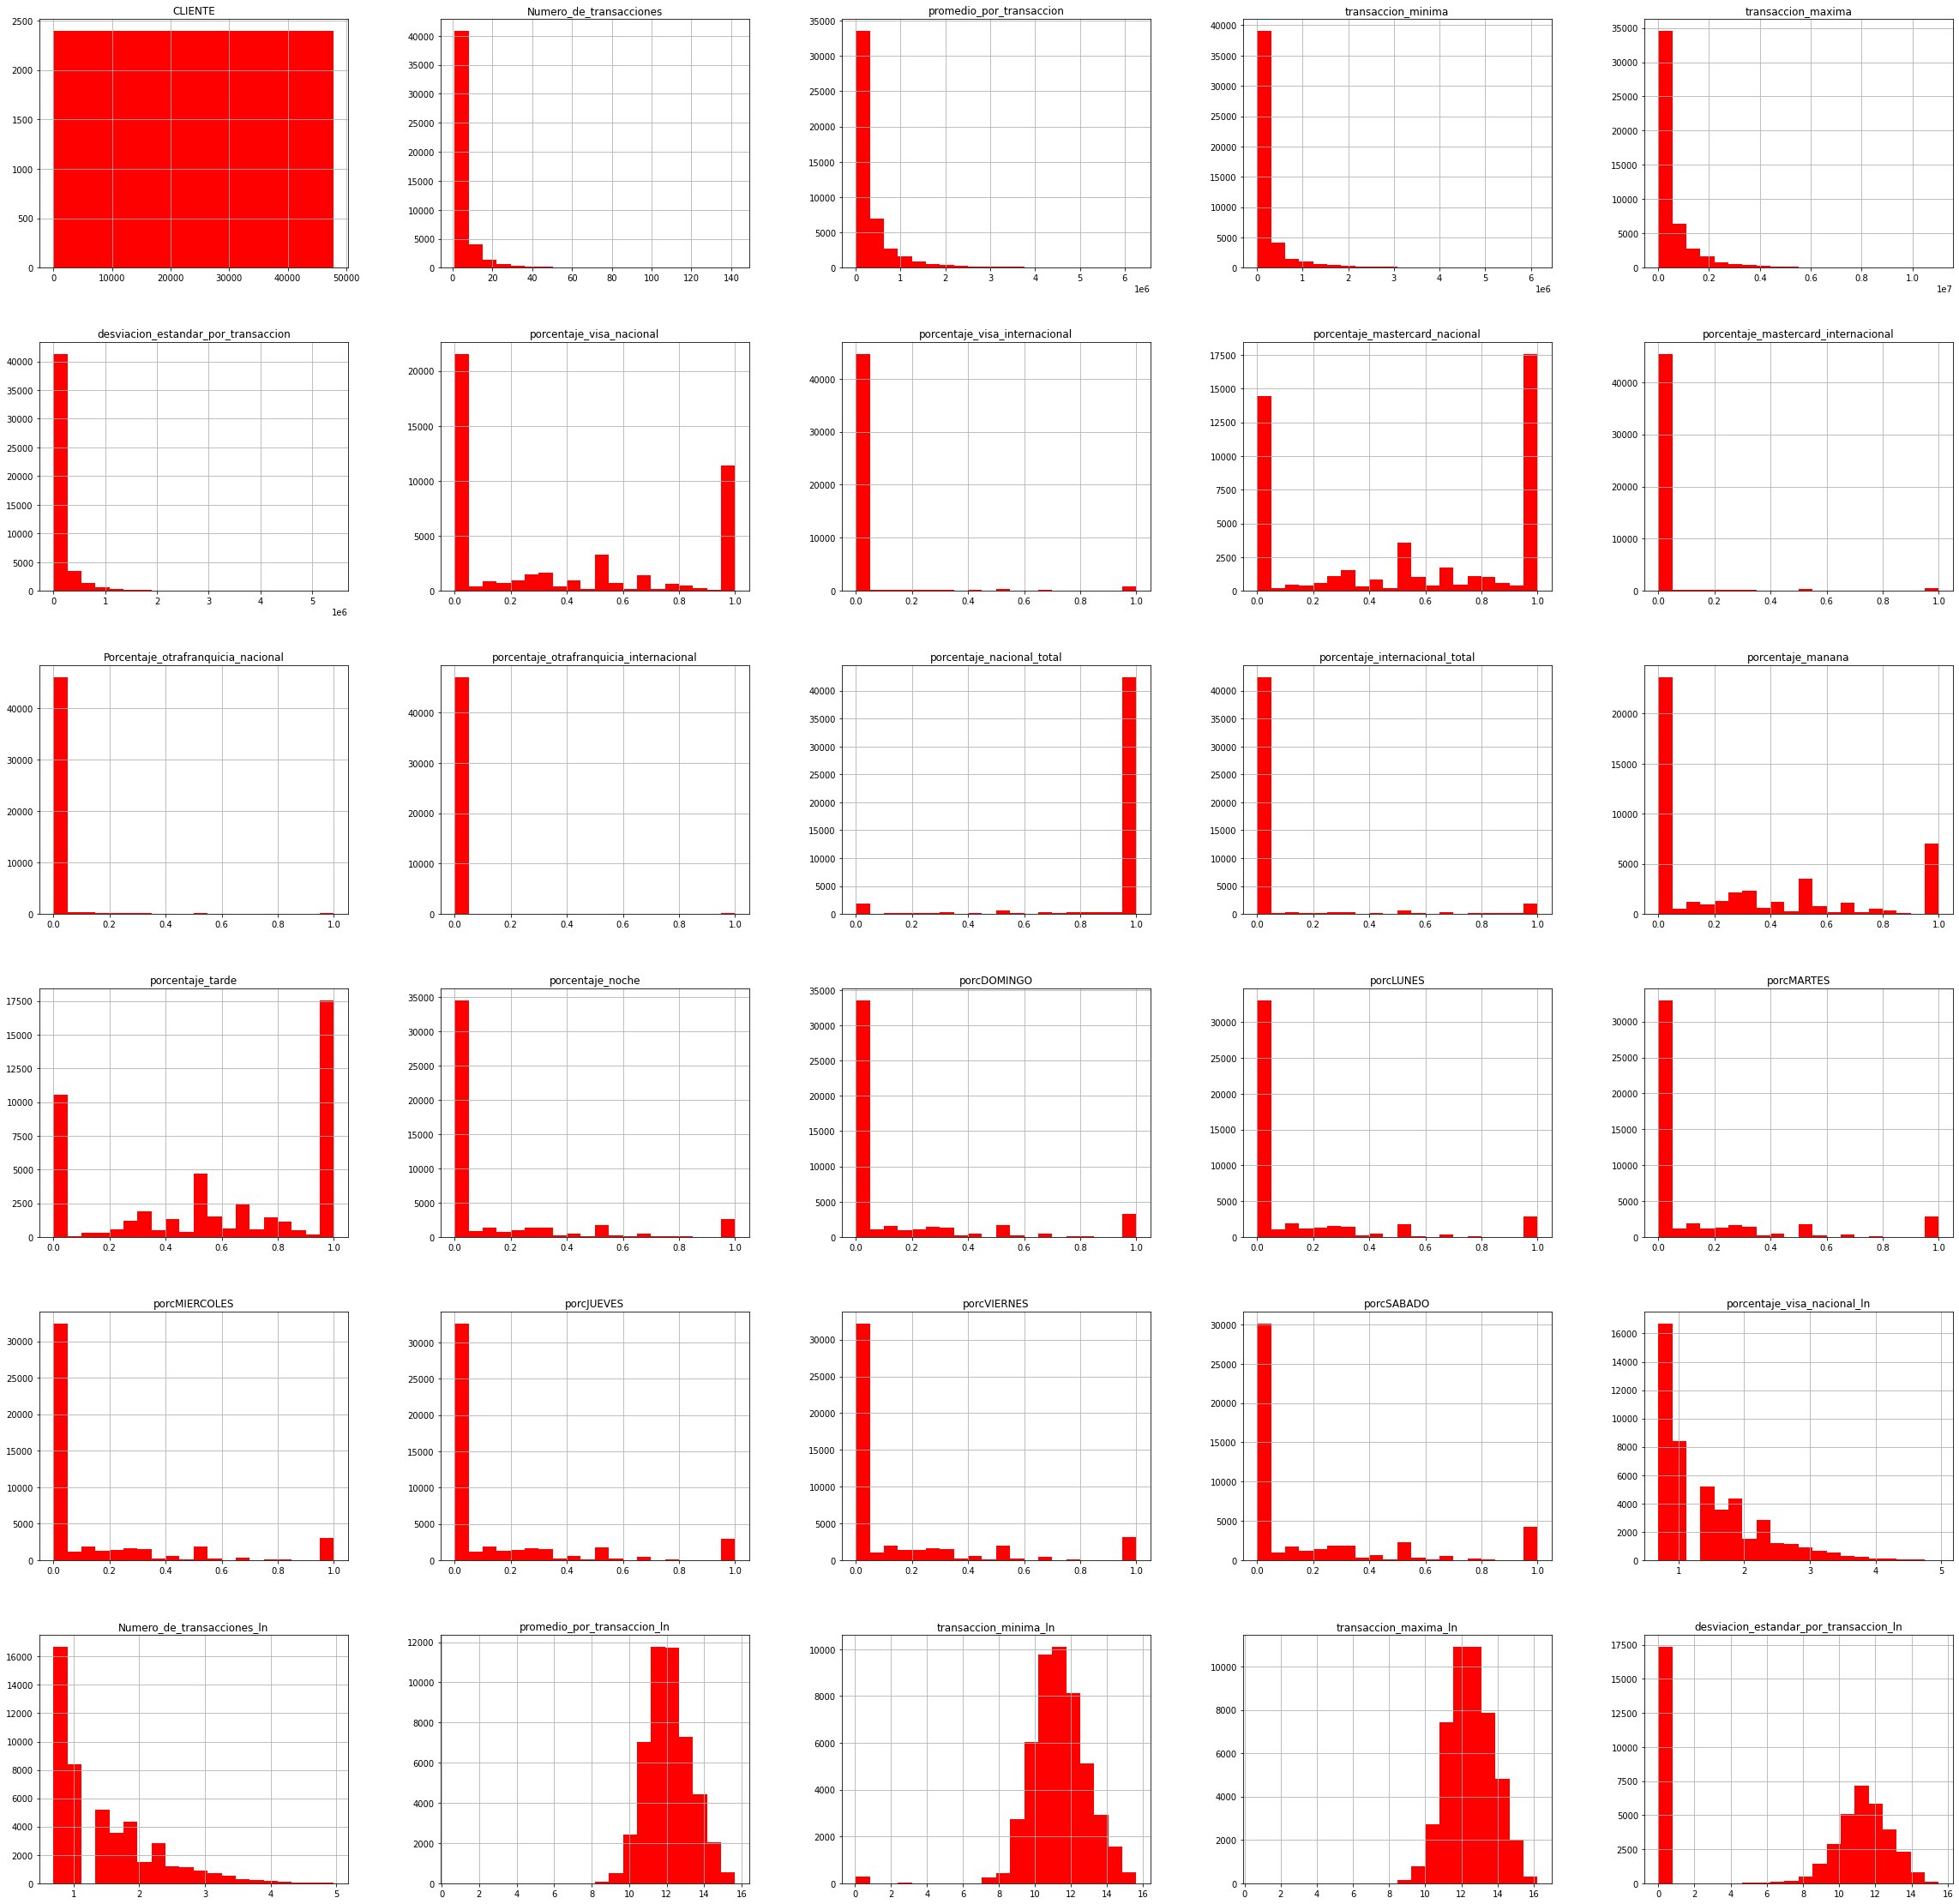

In [19]:
df.hist(bins = 20, figsize=(40,40), color = 'r')

In [6]:
corr_df = df.corr(method='pearson')


<AxesSubplot:>

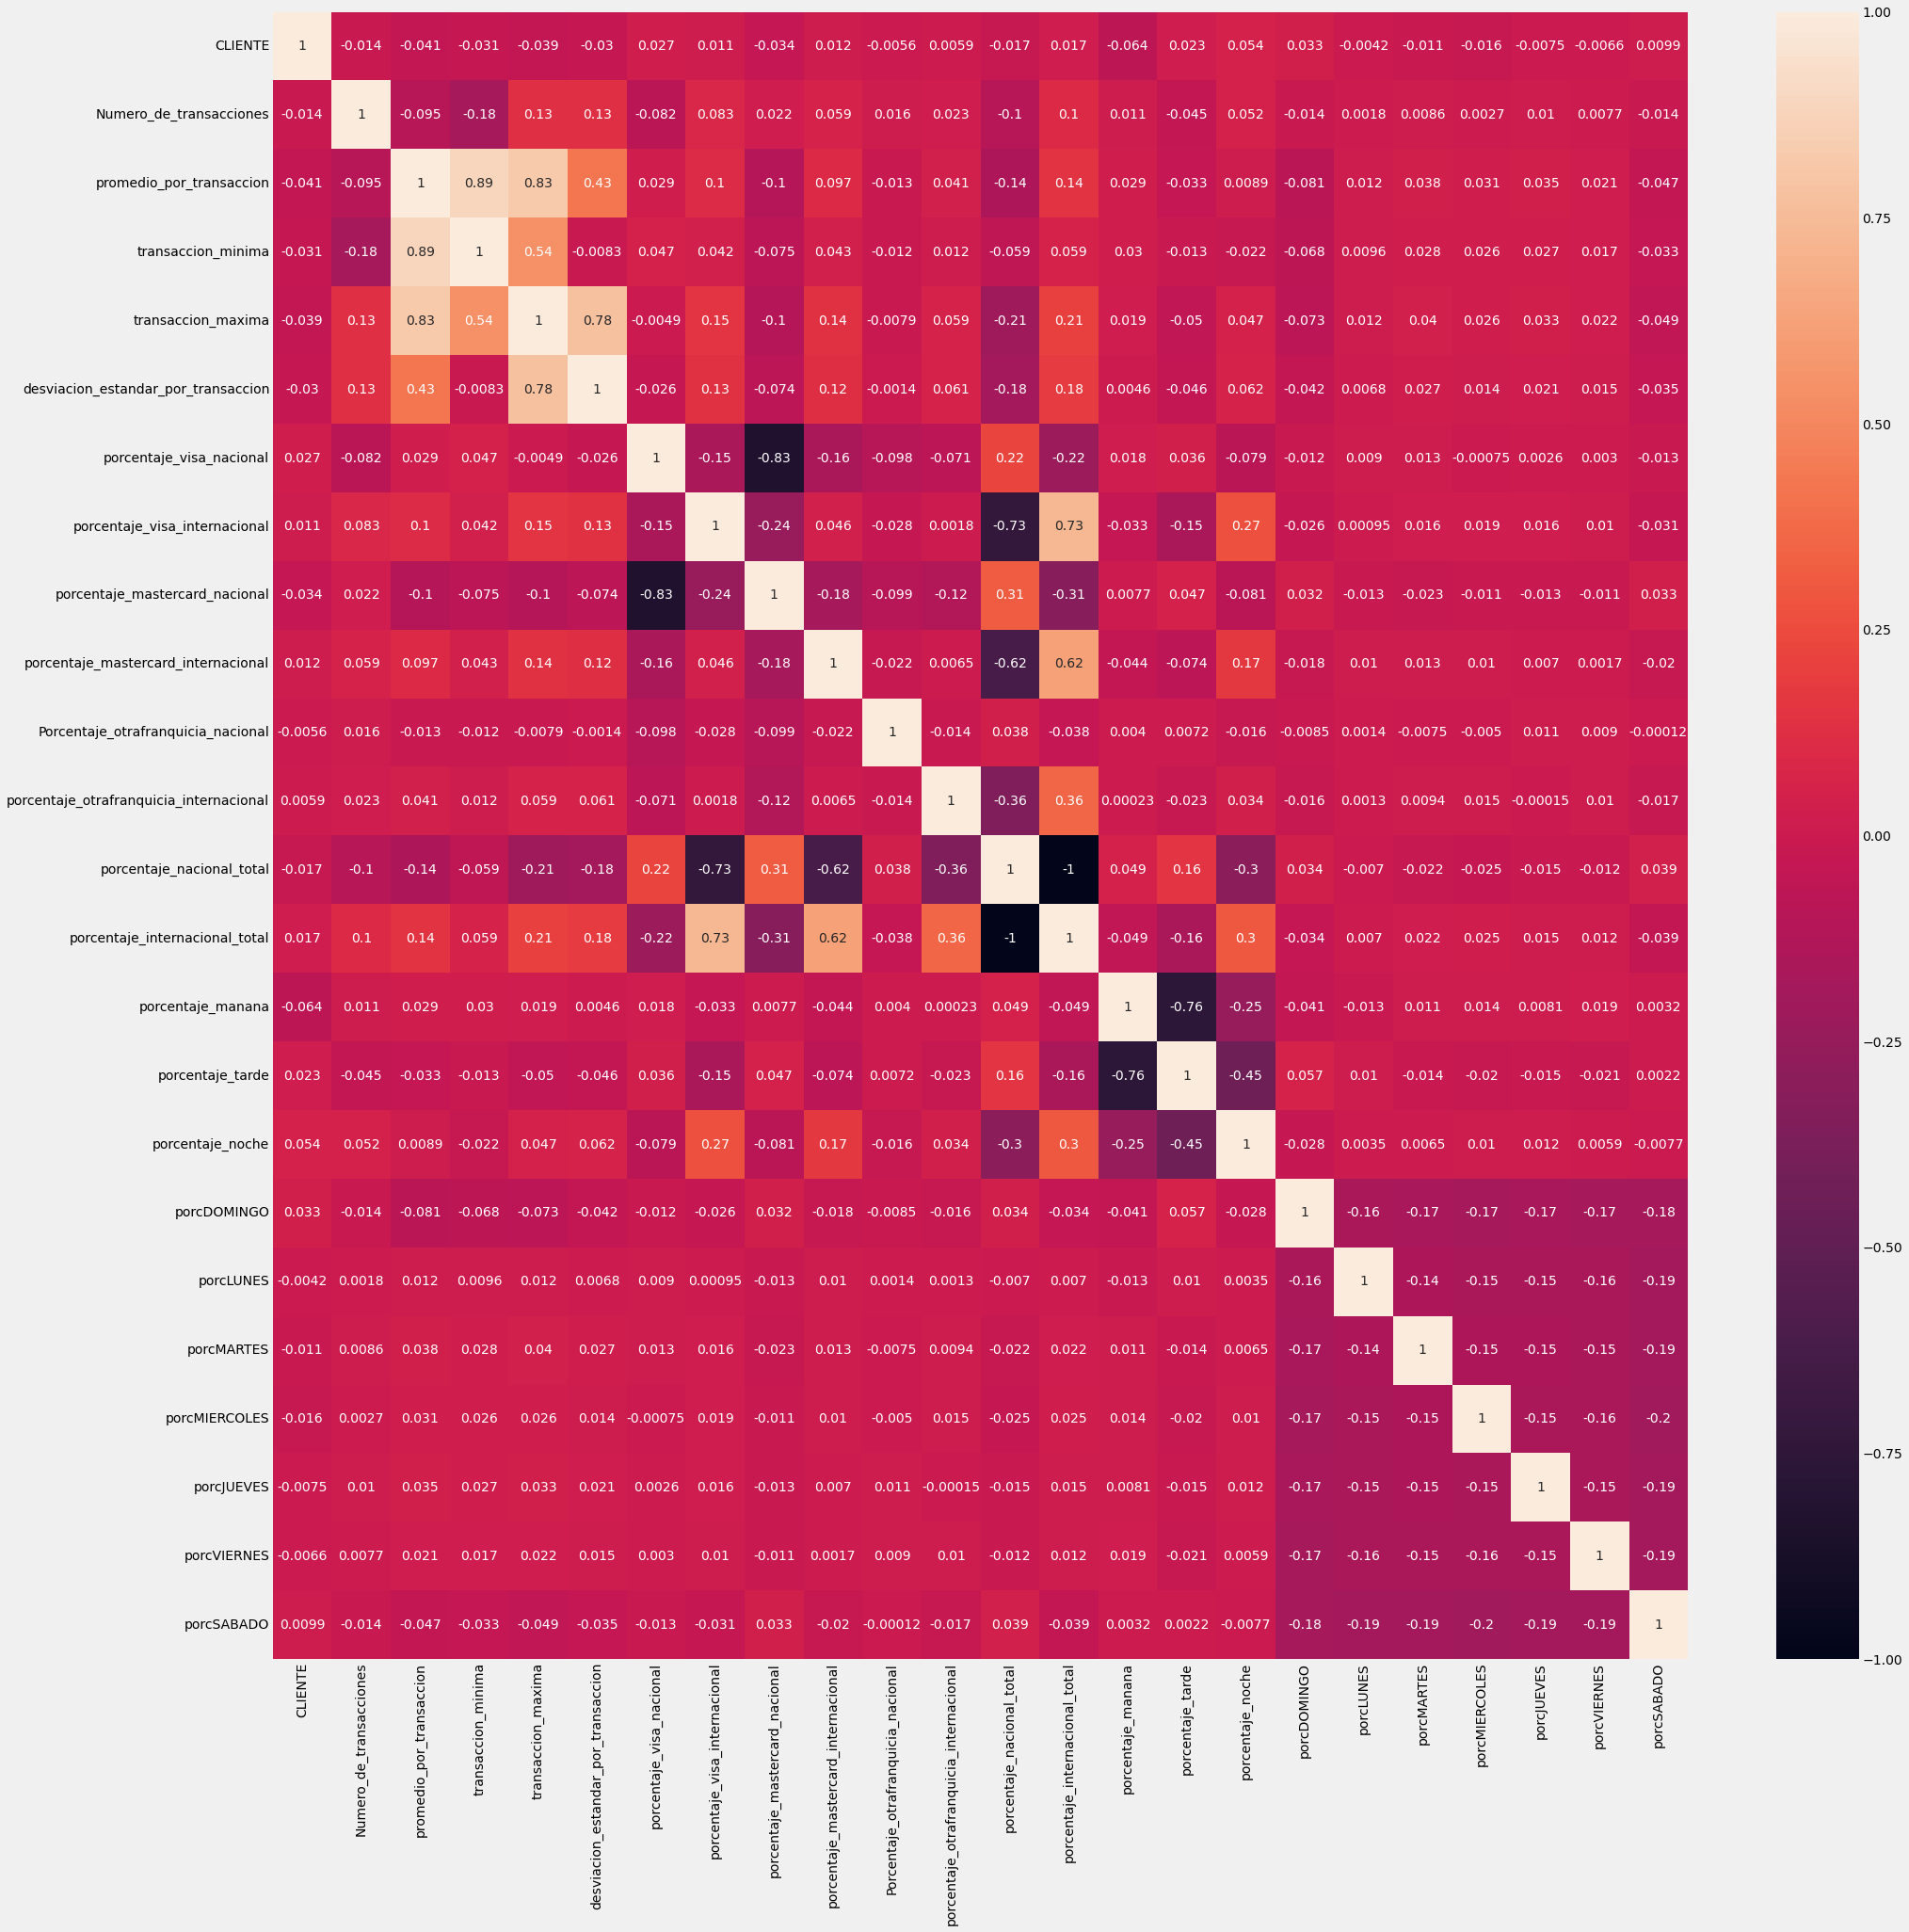

In [57]:
plt.figure(figsize=(30,30))
sns.heatmap(corr_df, annot=True)

In [21]:
df.columns

Index(['CLIENTE', 'grupo_de_cliente', 'Numero_de_transacciones',
       'promedio_por_transaccion', 'transaccion_minima', 'transaccion_maxima',
       'desviacion_estandar_por_transaccion', 'porcentaje_visa_nacional',
       'porcentaje_visa_internacional', 'porcentaje_mastercard_nacional',
       'porcentaje_mastercard_internacional',
       'Porcentaje_otrafranquicia_nacional',
       'porcentaje_otrafranquicia_internacional', 'porcentaje_nacional_total',
       'porcentaje_internacional_total', 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO', 'Sitio_consumo_masfrecuente',
       'porcentaje_visa_nacional_ln', 'Numero_de_transacciones_ln',
       'promedio_por_transaccion_ln', 'transaccion_minima_ln',
       'transaccion_maxima_ln', 'desviacion_estandar_por_transaccion_ln'],
      dtype='object')

## First Version

In [26]:
cols_modelo_1 = [ 'porcentaje_visa_nacional',
       'porcentaje_visa_internacional', 'porcentaje_mastercard_nacional',
       'porcentaje_mastercard_internacional',
       'Porcentaje_otrafranquicia_nacional',
       'porcentaje_otrafranquicia_internacional', 'porcentaje_nacional_total',
       'porcentaje_internacional_total', 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO', 
       'porcentaje_visa_nacional_ln', 'Numero_de_transacciones_ln',
       'promedio_por_transaccion_ln', 'transaccion_minima_ln',
       'transaccion_maxima_ln', 'desviacion_estandar_por_transaccion_ln']

In [27]:
X = np.array(df[cols_modelo_1])

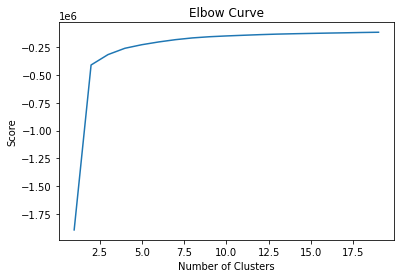

In [28]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [35]:
modelo_1 = KMeans(n_clusters=3).fit(X)
# Predicting the clusters
labels = modelo_1.predict(X)

In [36]:
centroids = modelo_1.cluster_centers_
print(centroids)

[[3.49820063e-01 2.91552827e-02 5.78916625e-01 1.97047957e-02
  1.59572258e-02 6.44600816e-03 9.44693913e-01 5.53060865e-02
  2.87054858e-01 5.81301990e-01 1.31643152e-01 1.52561724e-01
  1.31863650e-01 1.28455478e-01 1.32431458e-01 1.26672868e-01
  1.39440296e-01 1.88574527e-01 1.82985889e+00 1.82985889e+00
  1.12996642e+01 1.01579197e+01 1.18766394e+01 1.05047710e+01]
 [4.16657094e-01 2.23434808e-02 5.27958070e-01 1.62837450e-02
  1.16456060e-02 5.11200460e-03 9.56260770e-01 4.37392303e-02
  2.84496868e-01 6.07608244e-01 1.07894888e-01 1.42304231e-01
  1.30404442e-01 1.28768068e-01 1.41197295e-01 1.35366766e-01
  1.41234494e-01 1.80724704e-01 7.13464387e-01 7.13464387e-01
  1.22061041e+01 1.22061015e+01 1.22061064e+01 8.77517588e-03]
 [3.52477560e-01 6.39351129e-02 5.04025887e-01 4.84646629e-02
  1.41631049e-02 1.69336718e-02 8.70666552e-01 1.29333448e-01
  2.93899070e-01 5.55959815e-01 1.50141115e-01 1.18763074e-01
  1.33283819e-01 1.43295562e-01 1.46134525e-01 1.49380739e-01
  1.44

In [37]:
centroids_df = pd.DataFrame(centroids,columns=cols_modelo_1).T

In [38]:
centroids_df

,0,1,2
porcentaje_visa_nacional,0.349820,0.416657,0.352478
porcentaje_visa_internacional,0.029155,0.022343,0.063935
porcentaje_mastercard_nacional,0.578917,0.527958,0.504026
porcentaje_mastercard_internacional,0.019705,0.016284,0.048465
Porcentaje_otrafranquicia_nacional,0.015957,0.011646,0.014163
porcentaje_otrafranquicia_internacional,0.006446,0.005112,0.016934
porcentaje_nacional_total,0.944694,0.956261,0.870667
porcentaje_internacional_total,0.055306,0.043739,0.129333
porcentaje_manana,0.287055,0.284497,0.293899
porcentaje_tarde,0.581302,0.607608,0.555960


## Second Version

In [87]:
cols_modelo_2 = [ 'porcentaje_visa_nacional',
       'porcentaje_visa_internacional', 'porcentaje_mastercard_nacional',
       'porcentaje_mastercard_internacional',
       'Porcentaje_otrafranquicia_nacional',
       'porcentaje_otrafranquicia_internacional', 'porcentaje_nacional_total',
       'porcentaje_internacional_total', 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO']

In [88]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

### Silhouette score

In [89]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df[cols_modelo_2])
    score = silhouette_score(df[cols_modelo_2], kmeans.labels_)
    silhouette_coefficients.append(score)

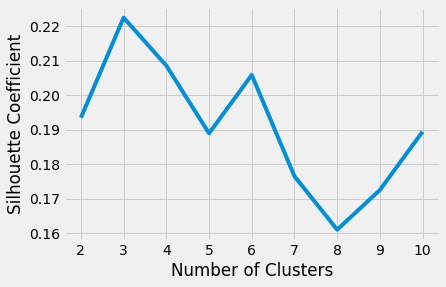

In [90]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
modelo_2 = KMeans(n_clusters=2).fit(X)

## Third Version

In [52]:
cols_modelo_3 = [ 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO']

In [53]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df[cols_modelo_3])
    score = silhouette_score(df[cols_modelo_3], kmeans.labels_)
    silhouette_coefficients.append(score)

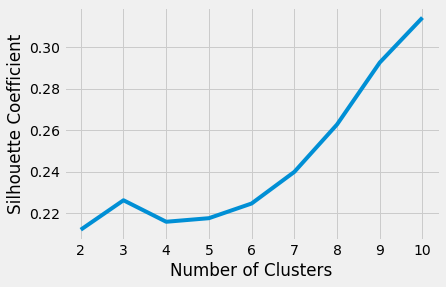

In [54]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Fourth Version

In [91]:
cols_modelo_4 = ['Numero_de_transacciones',
       'promedio_por_transaccion','porcentaje_manana',
        'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO']

In [92]:
scaler =StandardScaler()
scaled_features = scaler.fit_transform(df[cols_modelo_4])

In [93]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [94]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

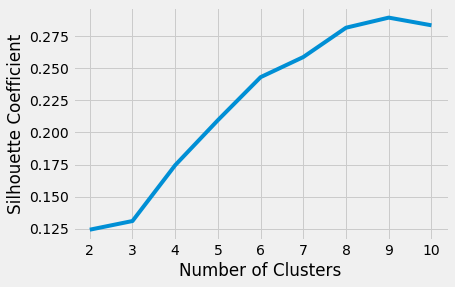

In [95]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Fifth Version

In [129]:
df['lunes_dinero'] = df['promedio_por_transaccion']*df['porcLUNES']*df['Numero_de_transacciones']
df['martes_dinero'] = df['promedio_por_transaccion']*df['porcMARTES']*df['Numero_de_transacciones']
df['miercoles_dinero'] = df['promedio_por_transaccion']*df['porcMIERCOLES']*df['Numero_de_transacciones']
df['jueves_dinero'] = df['promedio_por_transaccion']*df['porcJUEVES']*df['Numero_de_transacciones']
df['viernes_dinero'] = df['promedio_por_transaccion']*df['porcVIERNES']*df['Numero_de_transacciones']
df['sabado_dinero'] = df['promedio_por_transaccion']*df['porcSABADO']*df['Numero_de_transacciones']
df['domingo_dinero'] = df['promedio_por_transaccion']*df['porcDOMINGO']*df['Numero_de_transacciones']

df['lunes_ocasiones'] = df['porcLUNES']*df['Numero_de_transacciones']
df['martes_ocasiones'] = df['porcMARTES']*df['Numero_de_transacciones']
df['miercoles_ocasiones'] = df['porcMIERCOLES']*df['Numero_de_transacciones']
df['jueves_ocasiones'] = df['porcJUEVES']*df['Numero_de_transacciones']
df['viernes_ocasiones'] = df['porcVIERNES']*df['Numero_de_transacciones']
df['sabado_ocasiones'] = df['porcSABADO']*df['Numero_de_transacciones']
df['domingo_ocasiones'] = df['porcDOMINGO']*df['Numero_de_transacciones']

In [130]:
df.columns

Index(['CLIENTE', 'grupo_de_cliente', 'Numero_de_transacciones',
       'promedio_por_transaccion', 'transaccion_minima', 'transaccion_maxima',
       'desviacion_estandar_por_transaccion', 'porcentaje_visa_nacional',
       'porcentaje_visa_internacional', 'porcentaje_mastercard_nacional',
       'porcentaje_mastercard_internacional',
       'Porcentaje_otrafranquicia_nacional',
       'porcentaje_otrafranquicia_internacional', 'porcentaje_nacional_total',
       'porcentaje_internacional_total', 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO', 'Sitio_consumo_masfrecuente',
       'porcentaje_visa_nacional_ln', 'Numero_de_transacciones_ln',
       'promedio_por_transaccion_ln', 'transaccion_minima_ln',
       'transaccion_maxima_ln', 'desviacion_estandar_por_transaccion_ln',
       'lunes_dinero', 'martes_dinero', 'miercoles_dinero', 'jueves_dinero',
 

In [131]:
cols_modelo_5 = [ 'Numero_de_transacciones', 'lunes_ocasiones', 'martes_ocasiones', 'miercoles_ocasiones',
       'jueves_ocasiones', 'viernes_ocasiones', 'sabado_ocasiones',
       'domingo_ocasiones',
       'promedio_por_transaccion', 'transaccion_minima', 'transaccion_maxima',       
       'lunes_dinero', 'martes_dinero', 'miercoles_dinero', 'jueves_dinero',
       'viernes_dinero', 'sabado_dinero', 'domingo_dinero']

In [132]:
scaler =StandardScaler()
scaled_features = scaler.fit_transform(df[cols_modelo_5])

In [133]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [134]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

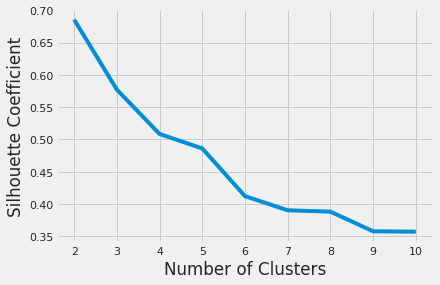

In [135]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [144]:
modelo_5 = KMeans(n_clusters=2).fit(scaled_features)

In [145]:
labels = modelo_5.predict(scaled_features)
df['cluster_5'] = labels

In [146]:
df.groupby('cluster_5')['CLIENTE'].count()

cluster_5
0    45272
1     2599
Name: CLIENTE, dtype: int64

In [147]:
centroids = modelo_5.cluster_centers_
centroids_df = pd.DataFrame(centroids,columns=cols_modelo_5).T
centroids_df

,0,1
Numero_de_transacciones,-0.173424,3.024559
lunes_ocasiones,-0.124801,2.176567
martes_ocasiones,-0.128995,2.249710
miercoles_ocasiones,-0.128914,2.248291
jueves_ocasiones,-0.128700,2.244558
viernes_ocasiones,-0.130261,2.271786
sabado_ocasiones,-0.119122,2.077527
domingo_ocasiones,-0.106888,1.864154
promedio_por_transaccion,-0.013822,0.241060
transaccion_minima,0.018082,-0.315357


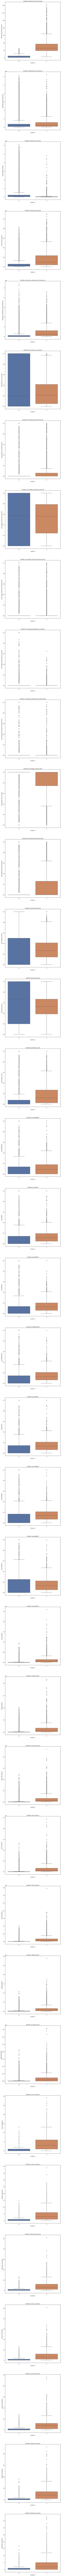

In [148]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="ticks")

graph_columns = [ 'Numero_de_transacciones',
       'promedio_por_transaccion', 'transaccion_minima', 'transaccion_maxima',
       'desviacion_estandar_por_transaccion', 'porcentaje_visa_nacional',
       'porcentaje_visa_internacional', 'porcentaje_mastercard_nacional',
       'porcentaje_mastercard_internacional',
       'Porcentaje_otrafranquicia_nacional',
       'porcentaje_otrafranquicia_internacional', 'porcentaje_nacional_total',
       'porcentaje_internacional_total', 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO',
       'lunes_dinero', 'martes_dinero', 'miercoles_dinero', 'jueves_dinero',
       'viernes_dinero', 'sabado_dinero', 'domingo_dinero',  'lunes_ocasiones', 'martes_ocasiones', 'miercoles_ocasiones',
       'jueves_ocasiones', 'viernes_ocasiones', 'sabado_ocasiones',
       'domingo_ocasiones']
cluster = 'cluster_5'

rows_sz= len(graph_columns)
columns_sz=1
fig, axes = plt.subplots(rows_sz,columns_sz,figsize=(10,500))

for idx,column in enumerate(graph_columns):

    sns.boxplot( ax=axes[idx],
    data=df,
    x=cluster, y=column)
    #id=idx
    #print(idx)
    axes[idx].set_title('Variable: {}'.format(column))

In [151]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="ticks")

graph_columns = [ 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO']
cluster = 'cluster_5'

rows_sz= 1
columns_sz=len(graph_columns)
fig, axes = plt.subplots(rows_sz,columns_sz,figsize=(500,100))

for idx,column in enumerate(graph_columns):

    sns.boxplot( ax=axes[idx],
    data=df,
    x=cluster, y=column)
    #id=idx
    #print(idx)
    axes[idx].set_title('Variable: {}'.format(column))